In [1]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ft2font
from matplotlib.cm import get_cmap
from matplotlib.colors import LinearSegmentedColormap
import itertools
from itertools import zip_longest
from scipy.sparse import lil_matrix, csr_matrix
from scipy.sparse import dok_matrix
from scipy.sparse import block_diag
from scipy.sparse.linalg import eigsh
import scipy.linalg as la
import os
import Hamiltonian_definition as HD

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
save_path = "/home/costanza/UNIVERSITÀ/secondo semestre/MOLTI CORPI/dati/"

## Lattice definition

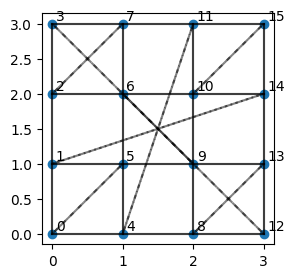

0 --> Nearest neighbors: [4, 3]  -- Next neighbor: [5]
1 --> Nearest neighbors: [5, 0]  -- Next neighbor: [14]
2 --> Nearest neighbors: [6, 1]  -- Next neighbor: [7]
3 --> Nearest neighbors: [7, 2]  -- Next neighbor: [12]
4 --> Nearest neighbors: [8, 7]  -- Next neighbor: [11]
5 --> Nearest neighbors: [9, 4]  -- Next neighbor: [0]
6 --> Nearest neighbors: [10, 5]  -- Next neighbor: [9]
7 --> Nearest neighbors: [11, 6]  -- Next neighbor: [2]
8 --> Nearest neighbors: [12, 11]  -- Next neighbor: [13]
9 --> Nearest neighbors: [13, 8]  -- Next neighbor: [6]
10 --> Nearest neighbors: [14, 9]  -- Next neighbor: [15]
11 --> Nearest neighbors: [15, 10]  -- Next neighbor: [4]
12 --> Nearest neighbors: [0, 15]  -- Next neighbor: [3]
13 --> Nearest neighbors: [1, 12]  -- Next neighbor: [8]
14 --> Nearest neighbors: [2, 13]  -- Next neighbor: [1]
15 --> Nearest neighbors: [3, 14]  -- Next neighbor: [10]


In [3]:
Lx, Ly = 4,4 # lattice dim
L=Lx*Ly
dim=2**(Lx*Ly)

coor = HD.generate_lattice(Lx,Ly)
neighbors_indices = HD.index_nn(coor,Lx,Ly)
diag_indices = HD.index_nnn(coor,Lx,Ly)

HD.plot_lattice(coor,neighbors_indices,diag_indices)

## Chancing J1 J2

In [ ]:

"""
N=9
HN = HD.build_HN(Lx,Ly,N,J1,J2,neighbors_indices,diag_indices)
HN = HN.toarray()

eigvals, eigvecs = la.eigh(HN)
print(eigvals[0])"
"""


### Diagonalization

In [5]:
#angles = [(2*i-1)*np.pi/16 for i in range(6)]
#theta = angles[1:-1]
print(theta)



[0.39269908169872414]
9
10
11
12
13
14
15
16


In [5]:
%%time
J1 = [0.01]
J2 = [1.0]
#for i in range(len(theta)):
for i in range(len(J1)):
    print("-------------------------------")
    # print(i, f"theta={theta[i]}")
    # J1=np.sin(theta[i])
    # J2=np.cos(theta[i])
    print(i)
    J1=J1[i]
    J2=J2[i]
    folder_name = f"J1={round(J1,2)}_J2={round(J2,2)}/"
    full_path = save_path + folder_name
    os.makedirs(full_path, exist_ok=True)

    HN = []
    for N in range(Lx*Ly+1):
        print(f'N={N}')
        HN.append(HD.build_HN(Lx,Ly,N,J1,J2,neighbors_indices,diag_indices))
        print(HN[N].shape)

        HN_dict = {}
        HN_dict[f'HN_{N}'] = HN[N].toarray()

        eigvals, eigvecs = la.eigh(HN_dict[f'HN_{N}'])
        print(f"finito di diagonalizzare HN_{N} alle", datetime.now())
        print("")
        
        folder_eig = f"eigvals block N={N}/"
        path = full_path + folder_eig
        os.makedirs(path, exist_ok=True)
        np.save(path+f"eigvals_N={N}", eigvals)
        np.save(path+f"eigvecs_N={N}", eigvecs)

-------------------------------
0
N=0
(1, 1)
finito di diagonalizzare HN_0 alle 2025-05-11 18:50:08.311701

N=1
(16, 16)
finito di diagonalizzare HN_1 alle 2025-05-11 18:50:08.429947

N=2
(120, 120)
finito di diagonalizzare HN_2 alle 2025-05-11 18:50:08.850107

N=3
(560, 560)
finito di diagonalizzare HN_3 alle 2025-05-11 18:50:11.268997

N=4
(1820, 1820)
finito di diagonalizzare HN_4 alle 2025-05-11 18:50:33.352097

N=5
(4368, 4368)
finito di diagonalizzare HN_5 alle 2025-05-11 18:53:53.638895

N=6
(8008, 8008)
finito di diagonalizzare HN_6 alle 2025-05-11 19:14:13.387705

N=7
(11440, 11440)
finito di diagonalizzare HN_7 alle 2025-05-11 19:41:58.784746

N=8
(12870, 12870)
finito di diagonalizzare HN_8 alle 2025-05-11 22:40:04.151000

N=9
(11440, 11440)
finito di diagonalizzare HN_9 alle 2025-05-11 23:07:26.370277

N=10
(8008, 8008)
finito di diagonalizzare HN_10 alle 2025-05-11 23:26:08.955000

N=11
(4368, 4368)
finito di diagonalizzare HN_11 alle 2025-05-11 23:28:18.323735

N=12
(1820

## Reading data

### Eigen values

#### J1=0, J2=1

/tmp/ipykernel_14031/2254583894.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = get_cmap("winter")


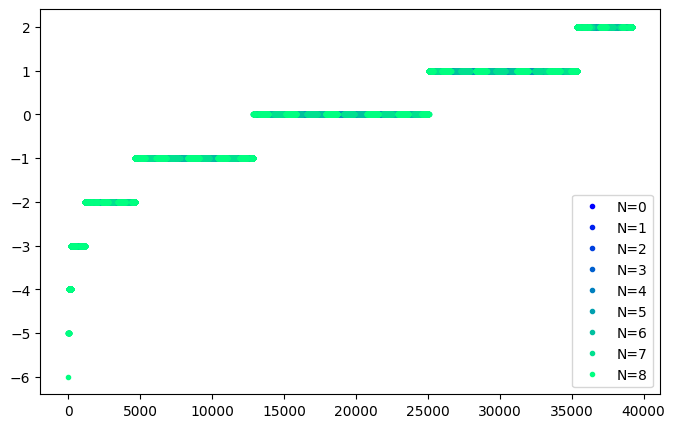

In [4]:
plt.figure(figsize=(8,5))
colormap = get_cmap("winter")
colors = colormap(np.linspace(0, 1, 9))

all_eigvals = []
all_labels = []
for i in range(9):
    a=np.load(save_path+"J1=0.0_J2=1.0/"+f"eigvals block N={i}/"+f"eigvals_N={i}.npy")
    all_eigvals.extend(a)
    all_labels.extend([i]*len(a)) 

all_eigvals = np.array(all_eigvals)
all_labels = np.array(all_labels)
sorted_indices = np.argsort(all_eigvals)
all_eigvals_sorted = all_eigvals[sorted_indices]
all_labels_sorted = all_labels[sorted_indices]

for i in range(9):
    mask = all_labels_sorted == i
    plt.plot(np.where(mask)[0], all_eigvals_sorted[mask], '.', color=colors[i], label=f"N={i}")

plt.legend()
plt.show()

eigvals_0_1 = all_eigvals_sorted
labels_0_1 = all_labels_sorted

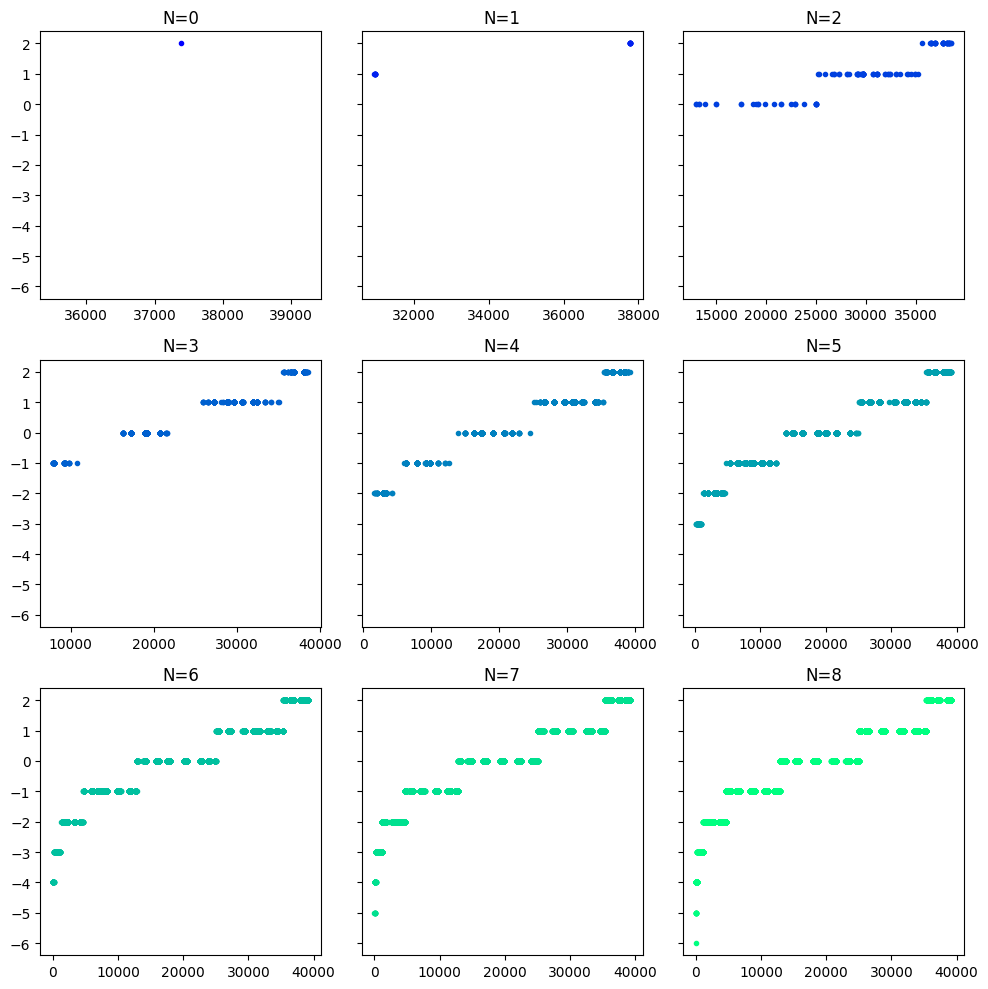

In [5]:

fig, axes = plt.subplots(3,3, figsize=(10, 10), sharey=True)

for i, ax in enumerate(axes.flatten()):
    mask = all_labels_sorted == i
    ax.plot(np.where(mask)[0], all_eigvals_sorted[mask], '.', color=colors[i])
    ax.set_title(f"N={i}")
plt.tight_layout()
plt.show()

#### J1=1, J2=0

/tmp/ipykernel_14031/3255430011.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = get_cmap("winter")


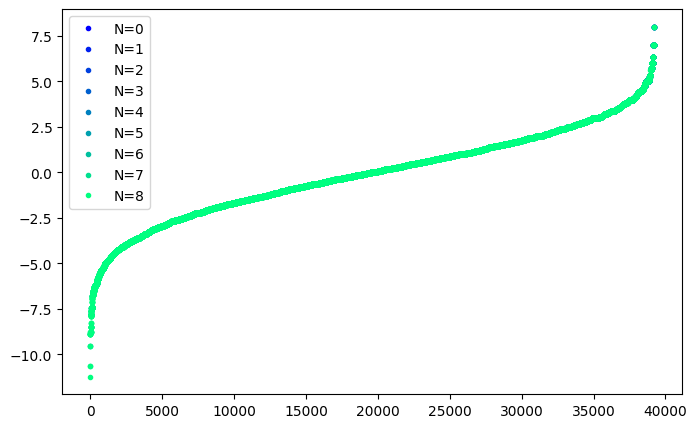

-11.228483208428862


In [ ]:
plt.figure(figsize=(8,5))
colormap = get_cmap("winter")
colors = colormap(np.linspace(0, 1, 9))

all_eigvals = []
all_labels = []
for i in range(9):
    a=np.load(save_path+"J1=1.0_J2=0.0/"+f"eigvals block N={i}/"+f"eigvals_N={i}.npy")
    all_eigvals.extend(a)
    all_labels.extend([i]*len(a)) 

all_eigvals = np.array(all_eigvals)
all_labels = np.array(all_labels)
sorted_indices = np.argsort(all_eigvals)
all_eigvals_sorted = all_eigvals[sorted_indices]
all_labels_sorted = all_labels[sorted_indices]

for i in range(9):
    mask = all_labels_sorted == i
    plt.plot(np.where(mask)[0], all_eigvals_sorted[mask], '.', color=colors[i], label=f"N={i}")

plt.legend()
plt.show()
print(all_eigvals_sorted[0])

eigvals_1_0 = all_eigvals_sorted
labels_1_0 = all_labels_sorted



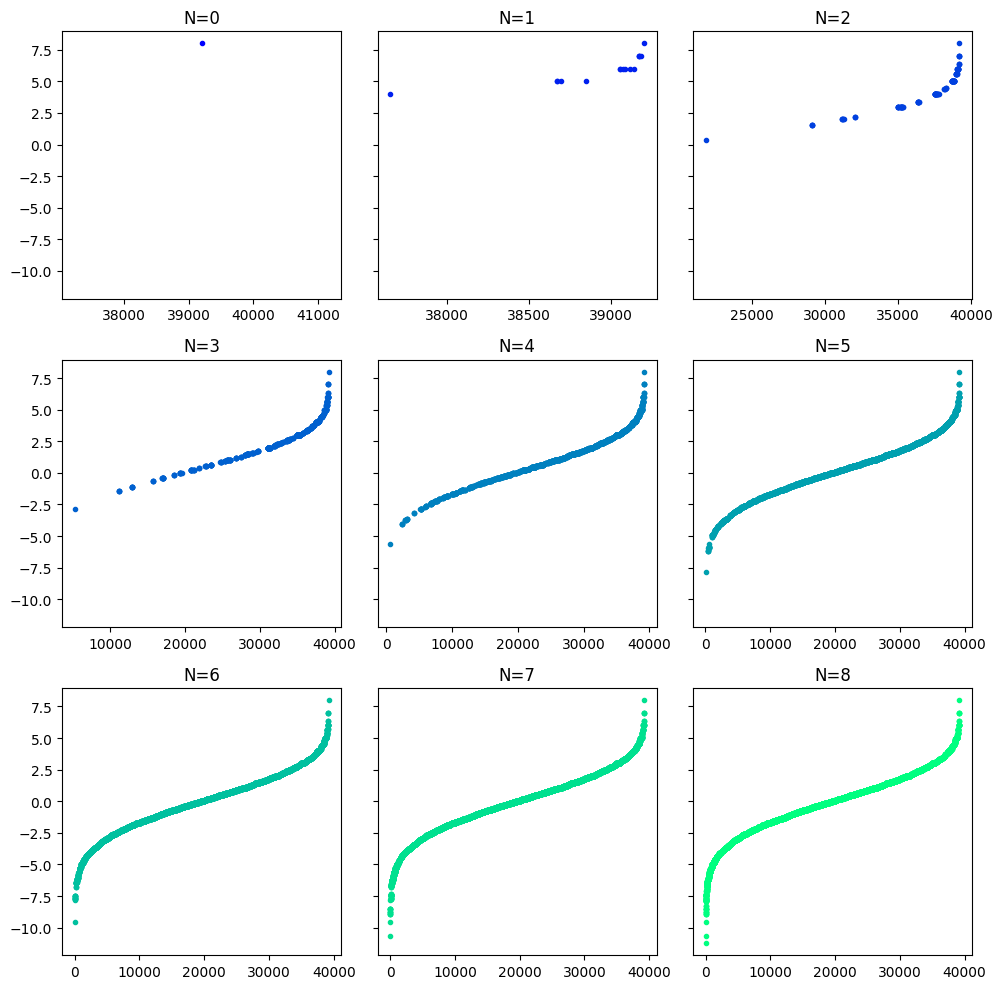

In [7]:
fig, axes = plt.subplots(3,3, figsize=(10, 10), sharey=True)

for i, ax in enumerate(axes.flatten()):
    mask = all_labels_sorted == i
    ax.plot(np.where(mask)[0], all_eigvals_sorted[mask], '.', color=colors[i])
    ax.set_title(f"N={i}")
plt.tight_layout()
plt.show()

#### Other values of J1 and J2

/tmp/ipykernel_21767/3487925783.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = get_cmap("winter")


J1=0.0_J2=1.0/, N=7, energia minima di questo sottospazio = -5.000000000000001
J1=0.0_J2=1.0/, N=8, energia minima di questo sottospazio = -5.999999999999999
J1=0.2_J2=0.98/, N=7, energia minima di questo sottospazio = -4.9467401058262945
J1=0.2_J2=0.98/, N=8, energia minima di questo sottospazio = -5.8847116824193835
J1=0.38_J2=0.92/, N=7, energia minima di questo sottospazio = -4.813386338298176
J1=0.38_J2=0.92/, N=8, energia minima di questo sottospazio = -5.543277195067721
J1=0.56_J2=0.83/, N=7, energia minima di questo sottospazio = -4.7155244440967685
J1=0.56_J2=0.83/, N=8, energia minima di questo sottospazio = -5.003067352111836
J1=0.71_J2=0.71/, N=7, energia minima di questo sottospazio = -6.359037719480635
J1=0.71_J2=0.71/, N=8, energia minima di questo sottospazio = -6.80538265006799
J1=0.83_J2=0.56/, N=7, energia minima di questo sottospazio = -7.917143056860151
J1=0.83_J2=0.56/, N=8, energia minima di questo sottospazio = -8.419872389258353
J1=0.92_J2=0.38/, N=7, energia m

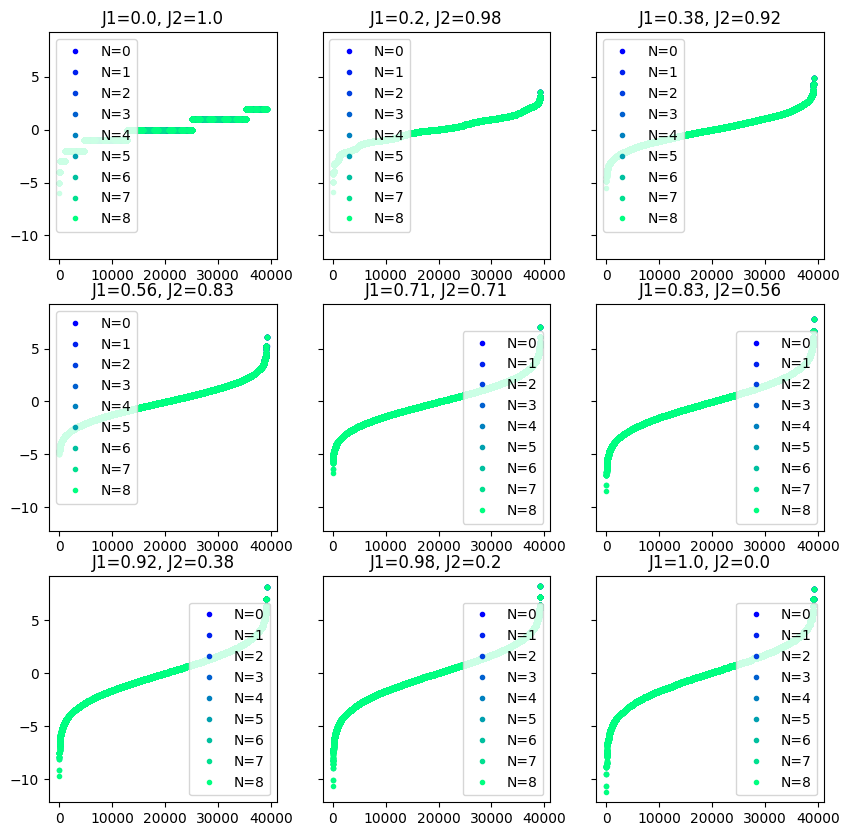

In [5]:
folder = ["J1=0.0_J2=1.0/", "J1=0.2_J2=0.98/","J1=0.38_J2=0.92/",
          "J1=0.56_J2=0.83/", "J1=0.71_J2=0.71/", "J1=0.83_J2=0.56/", 
          "J1=0.92_J2=0.38/", "J1=0.98_J2=0.2/", "J1=1.0_J2=0.0/"]
all_theta = [i*np.pi/16 for i in range(9)]

eigvals_dict = {}
labels_dict = {}

fig, axes = plt.subplots(3,3, figsize=(10, 10), sharey=True)
for F, ax in enumerate(axes.flatten()):

    colormap = get_cmap("winter")
    colors = colormap(np.linspace(0, 1, 9))

    all_eigvals = []
    all_labels = []
    for i in range(9):
        eigvals = np.load(save_path+folder[F]+f"eigvals block N={i}/"+f"eigvals_N={i}.npy")
        if i==8 or i==7:
            print(f"{folder[F]}, N={i}, energia minima di questo sottospazio = {np.min(eigvals)}")
        all_eigvals.extend(eigvals)
        all_labels.extend([i]*len(eigvals)) 

    all_eigvals = np.array(all_eigvals)
    all_labels = np.array(all_labels)

    sorted_indices = np.argsort(all_eigvals)
    all_eigvals_sorted = all_eigvals[sorted_indices]
    all_labels_sorted = all_labels[sorted_indices]

    for i in range(9):
        mask = all_labels_sorted == i
        ax.plot(np.where(mask)[0], all_eigvals_sorted[mask], '.', color=colors[i], label=f"N={i}")
    J1 = np.sin(all_theta[F])
    J2 = np.cos(all_theta[F])
    ax.set_title(f'J1={round(J1,2)}, J2={round(J2,2)}')
    ax.legend()

    eigvals_dict[f'all_theta_{F}'] = all_eigvals_sorted
    labels_dict[f'all_theta_{F}'] = all_labels_sorted

plt.show()

J1=1.0_J2=0.0/


/tmp/ipykernel_14031/2989311106.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = get_cmap("winter")


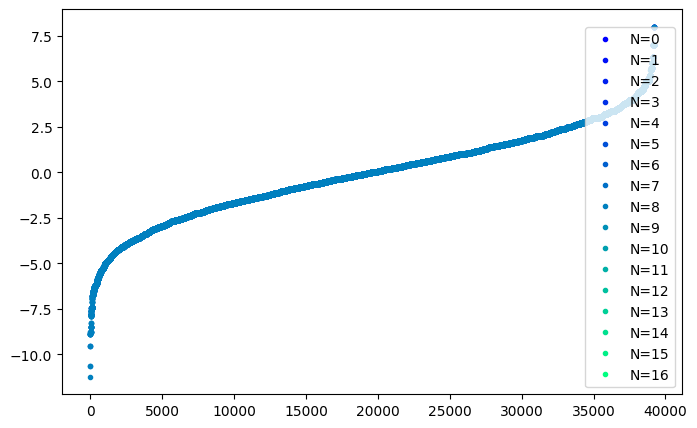

In [ ]:
#plotting of single spectrum
F=8
print(folder[F])
colormap = get_cmap("winter")
colors = colormap(np.linspace(0, 1, 17))psi1 = eigvecs[:,0]
psi2 = eigvecs[:,0]

SiSj_nn_exval, SiSj_nnn_exval = HD.spin_corr(Lx,Ly,psi1,psi2,N,neighbors_indices,diag_indices)

print("nearest neighbor correlation", SiSj_nn_exval)
print("next neighbor correlation", SiSj_nnn_exval)
plt.figure(figsize=(8,5))psi1 = eigvecs[:,0]
psi2 = eigvecs[:,0]

SiSj_nn_exval, SiSj_nnn_exval = HD.spin_corr(Lx,Ly,psi1,psi2,N,neighbors_indices,diag_indices)

print("nearest neighbor correlation", SiSj_nn_exval)
print("next neighbor correlation", SiSj_nnn_exval)
for i in range(17):
    mask = labels_dict[f'all_theta_{F}'] == i
    plt.plot(np.where(mask)[0],eigvals_dict[f'all_theta_{F}'][mask], '.', color=colors[i], label=f"N={i}")

plt.legend()

J1=0.56_J2=0.83/


/tmp/ipykernel_14031/2351494737.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = get_cmap("winter")


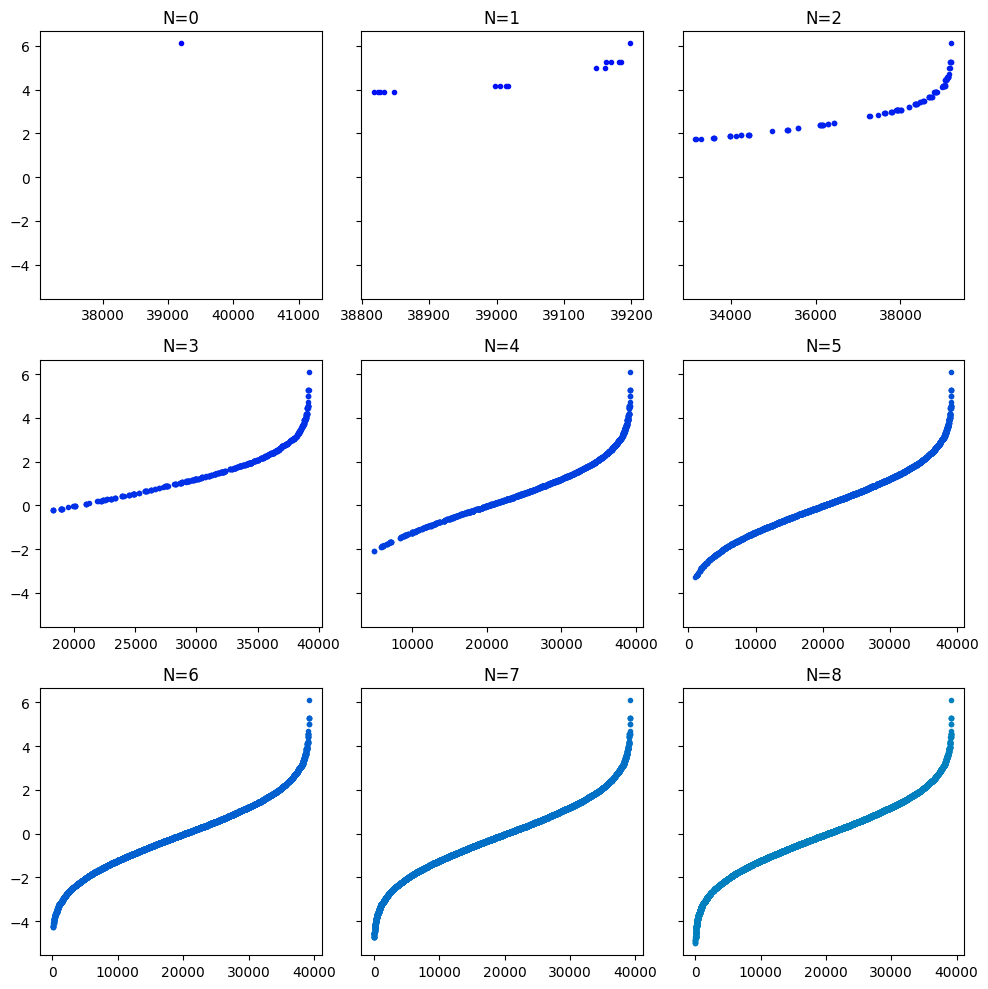

In [11]:
fig, axes = plt.subplots(3,3, figsize=(10, 10), sharey=True)
F=3
print(folder[F])
colormap = get_cmap("winter")
colors = colormap(np.linspace(0, 1, 17))
for i, ax in enumerate(axes.flatten()):
    mask = labels_dict[f'all_theta_{F}'] == i
    ax.plot(np.where(mask)[0], eigvals_dict[f'all_theta_{F}'][mask], '.', color=colors[i])
    ax.set_title(f"N={i}")
plt.tight_layout()
plt.show()

### J1=1, J2=0.01

/tmp/ipykernel_21767/695694716.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = get_cmap("winter")


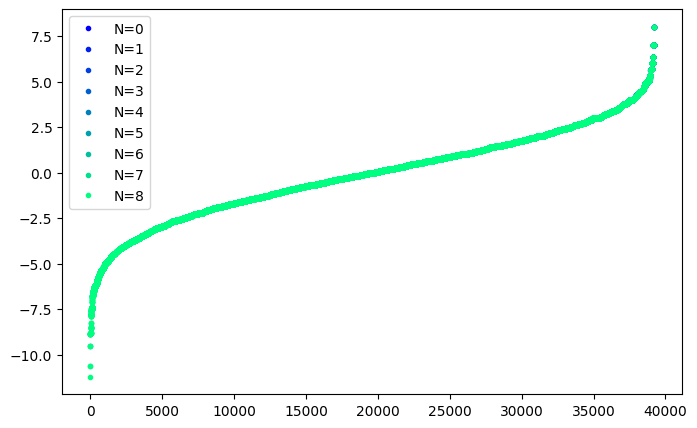

-11.211389276164043


In [9]:
plt.figure(figsize=(8,5))
colormap = get_cmap("winter")
colors = colormap(np.linspace(0, 1, 9))

all_eigvals = []
all_labels = []
for i in range(9):
    a=np.load(save_path+"J1=1.0_J2=0.01/"+f"eigvals block N={i}/"+f"eigvals_N={i}.npy")
    all_eigvals.extend(a)
    all_labels.extend([i]*len(a)) 

all_eigvals = np.array(all_eigvals)
all_labels = np.array(all_labels)
sorted_indices = np.argsort(all_eigvals)
all_eigvals_sorted = all_eigvals[sorted_indices]
all_labels_sorted = all_labels[sorted_indices]

for i in range(9):
    mask = all_labels_sorted == i
    plt.plot(np.where(mask)[0], all_eigvals_sorted[mask], '.', color=colors[i], label=f"N={i}")

plt.legend()
plt.show()
print(all_eigvals_sorted[0])

eigvals_1_0 = all_eigvals_sorted
labels_1_0 = all_labels_sorted

### J1=0.01_J2=1.0

/tmp/ipykernel_4083/4053991233.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = get_cmap("winter")


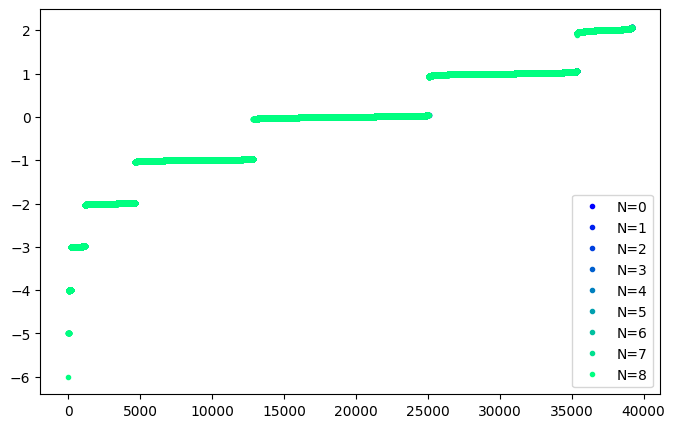

-5.999999999999998


In [4]:
plt.figure(figsize=(8,5))
colormap = get_cmap("winter")
colors = colormap(np.linspace(0, 1, 9))

all_eigvals = []
all_labels = []
for i in range(9):
    a=np.load(save_path+"J1=0.01_J2=1.0/"+f"eigvals block N={i}/"+f"eigvals_N={i}.npy")
    all_eigvals.extend(a)
    all_labels.extend([i]*len(a)) 

all_eigvals = np.array(all_eigvals)
all_labels = np.array(all_labels)
sorted_indices = np.argsort(all_eigvals)
all_eigvals_sorted = all_eigvals[sorted_indices]
all_labels_sorted = all_labels[sorted_indices]

for i in range(9):
    mask = all_labels_sorted == i
    plt.plot(np.where(mask)[0], all_eigvals_sorted[mask], '.', color=colors[i], label=f"N={i}")

plt.legend()
plt.show()
print(all_eigvals_sorted[0])

eigvals_1_0 = all_eigvals_sorted
labels_1_0 = all_labels_sorted

## Analysis

In [15]:
"""
JUST TO REMEMBER
folder = ["J1=0.0_J2=1.0/", "J1=0.2_J2=0.98/","J1=0.38_J2=0.92/",
          "J1=0.56_J2=0.83/", "J1=0.71_J2=0.71/", "J1=0.83_J2=0.56/", 
          "J1=0.92_J2=0.38/", "J1=0.98_J2=0.2/", "J1=1.0_J2=0.0/"]
all_theta = [i*np.pi/16 for i in range(9)]
eigvals_dict[f'all_theta_{F}'] = all_eigvals_sorted
labels_dict[f'all_theta_{F}'] = all_labels_sorted"
"""

'\nJUST TO REMEMBER\nfolder = ["J1=0.0_J2=1.0/", "J1=0.2_J2=0.98/","J1=0.38_J2=0.92/","J1=0.56_J2=0.83/", "J1=0.71_J2=0.71/", "J1=0.83_J2=0.56/", "J1=0.92_J2=0.38/", "J1=0.98_J2=0.2/", "J1=1.0_J2=0.0/"]\nall_theta = [i*np.pi/16 for i in range(9)]\neigvals_dict[f\'all_theta_{F}\'] = all_eigvals_sorted\nlabels_dict[f\'all_theta_{F}\'] = all_labels_sorted"\n'

### Plotting energies changing J1, J2

/tmp/ipykernel_18641/3050164959.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = get_cmap("rainbow")


Text(0, 0.5, 'eigvals')

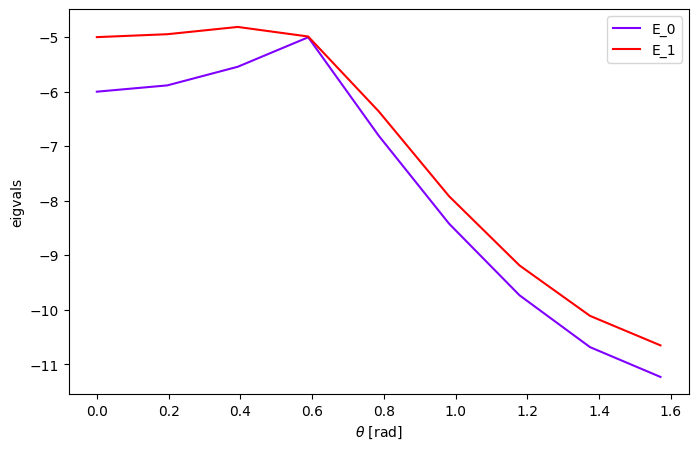

In [5]:
all_theta = [i*np.pi/16 for i in range(9)]
number = 2 #how many eigen values do you want?
J1 = np.sin(all_theta)
J2 = np.cos(all_theta)
plt.figure(figsize=(8,5))
colormap = get_cmap("rainbow")
colors = colormap(np.linspace(0, 1, number))
for j in range(number):
    energy = [eigvals_dict[f'all_theta_{i}'][j] for i in range(len(all_theta))]
    plt.plot(all_theta, energy, label=f'E_{j}',color=colors[j])
    plt.legend()
plt.xlabel(r'$\theta$ [rad]')# -- (J1=sin($\theta$))')
plt.ylabel('eigvals')
#plt.xlim(0.4,0.8)
#plt.ylim(-6,-4)

### gap changing J1, J2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0 J1=0.0, J2=1.0, J1/J2=0.0
0.2 J1=0.2, J2=0.98, J1/J2=0.19891
0.39 J1=0.38, J2=0.92, J1/J2=0.41421
0.59 J1=0.56, J2=0.83, J1/J2=0.66818
0.79 J1=0.71, J2=0.71, J1/J2=1.0
0.98 J1=0.83, J2=0.56, J1/J2=1.49661
1.18 J1=0.92, J2=0.38, J1/J2=2.41421
1.37 J1=0.98, J2=0.2, J1/J2=5.02734
1.57 J1=1.0, J2=0.0, J1/J2=1.633123935319537e+16
[1.         0.93797158 0.72989086 0.01424968 0.44634493 0.50272933
 0.54701688 0.57307467 0.57859834]
[ -5.          -4.94674011  -4.81338634  -4.98881767  -6.35903772
  -7.91714306  -9.18544797 -10.10902291 -10.64988487]
[ -6.          -5.88471168  -5.5432772   -5.00306735  -6.80538265
  -8.41987239  -9.73246485 -10.68209758 -11.22848321]


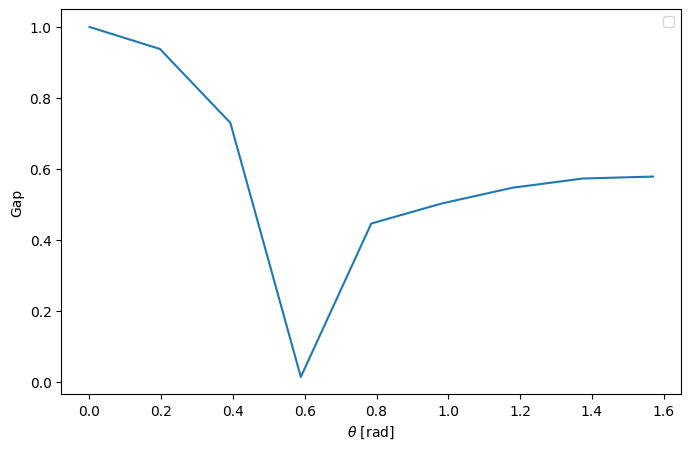

In [11]:

plt.figure(figsize=(8,5))
GS = [eigvals_dict[f'all_theta_{i}'][0] for i in range(len(all_theta))]
E1 = [eigvals_dict[f'all_theta_{i}'][1] for i in range(len(all_theta))]
J1 = np.sin(all_theta)
J2 = np.cos(all_theta)
for i in range(len(all_theta)):
    print(round(all_theta[i],2), f'J1={round(J1[i],2)}, J2={round(J2[i],2)}, J1/J2={round(J1[i]/J2[i],5)}')
plt.plot(all_theta, np.array(E1)-np.array(GS))
plt.xlabel(r'$\theta$ [rad]')#-- (J1=sin($\theta$))')
plt.ylabel('Gap')
plt.legend()
print(np.array(E1)-np.array(GS))
print(np.array(E1))
print(np.array(GS))

### Correlation

In [4]:
folder = ["J1=0.0_J2=1.0/", "J1=0.2_J2=0.98/","J1=0.38_J2=0.92/",
          "J1=0.56_J2=0.83/", "J1=0.71_J2=0.71/", "J1=0.83_J2=0.56/", 
          "J1=0.92_J2=0.38/", "J1=0.98_J2=0.2/", "J1=1.0_J2=0.0/", "J1=1.0_J2=0.01/", "J1=0.01_J2=1.0/"]

In [8]:
# loading of the eigen vectors
F = -1 #which folder? ie which values of J1 and J2
N = 8 #which block? ie number of spin up
print(folder[F])
eigvecs = np.load(save_path+folder[F]+f"eigvals block N={N}/"+f"eigvecs_N={N}.npy")
print(eigvecs.shape)

J1=0.01_J2=1.0/


(12870, 12870)


In [9]:
psi1 = eigvecs[:,0]
psi2 = eigvecs[:,0]

SiSj_nn_exval, SiSj_nnn_exval = HD.spin_corr(Lx,Ly,psi1,psi2,N,neighbors_indices,diag_indices)

print("nearest neighbor correlation", SiSj_nn_exval)
print("next neighbor correlation", SiSj_nnn_exval)

nearest neighbor correlation -4.959269606797132e-33
next neighbor correlation -0.7500000000000003


J1=0.01_J2=1.0/
i=0, j=0, corr=0.7500000000000004
i=0, j=1, corr=-3.6148592488076035e-16
i=0, j=2, corr=2.336985418768793e-16
i=0, j=3, corr=-1.8029892960634323e-18
i=1, j=0, corr=-3.6148592488076035e-16
i=1, j=1, corr=0.7500000000000004
i=1, j=2, corr=1.775736533143358e-17
i=1, j=3, corr=-2.498123253732231e-16
i=2, j=0, corr=2.336985418768793e-16
i=2, j=1, corr=1.775736533143358e-17
i=2, j=2, corr=0.7500000000000004
i=2, j=3, corr=-1.2371904968710117e-16
i=3, j=0, corr=-1.8029892960634323e-18
i=3, j=1, corr=-2.498123253732231e-16
i=3, j=2, corr=-1.2371904968710117e-16
i=3, j=3, corr=0.7500000000000004
nearest neighbor correlation -3.4666738998970245e-32
next neighbor correlation -0.7500000000000002


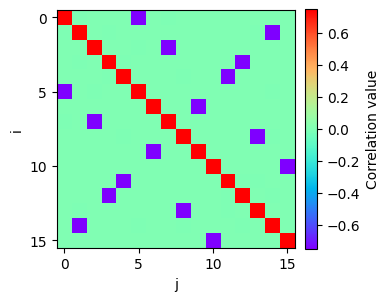

In [10]:
print(folder[F])

GS = eigvecs[:, 0]
L = Lx * Ly
correlations = HD.compute_sisj_correlations(GS, N, L)
for i in range(4):
    for j in range(4):
        print(f'i={i}, j={j}, corr={correlations[i,j]}')

SzSz_nn_exval, SzSz_nnn_exval = HD.sisj_mean(GS,N,L,neighbors_indices,diag_indices)
print("nearest neighbor correlation", SzSz_nn_exval)
print("next neighbor correlation", SzSz_nnn_exval)

# Plot tipo heatmap
fig, ax = plt.subplots(figsize=(4, 4))
im = ax.imshow(correlations, cmap='rainbow')

cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('Correlation value', fontsize=10)

ax.set_xlabel('j')
ax.set_ylabel('i')
ax.set_yticks([0,5,10,15])

plt.tight_layout()
plt.show()



